## SHARK ATTACK PROJECT

### hypothesis


H₁ (Alternative Hypothesis):
Provoked shark attacks are associated with a higher fatality rate compared to unprovoked shark attacks.

H₀ (Null Hypothesis):
There is no significant difference in fatality rates between provoked and unprovoked shark attacks.

Independent Variable --> Type (provoked/unprovoked)
Dependent Variable --> Fatality 

Control Variables: what can filter by: 
1. Location e.g., small number of beaches may function as persistent hotspots (Victoria)
2. Control for year (look at time trends) --> recorded incidents likely increased over time partly because of better documentation (Alex)
3. relation to activity --> look at when most provoked attacks happen (Rado)
4. sex --> do differences disappear when controlling for gender?(e.g. most frquent activity is fishing)

In [80]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [81]:
!pip install xlrd

import pandas as pd
url = ("https://www.sharkattackfile.net/spreadsheets/GSAF5.xls")
sharkattacks_data = pd.read_excel(url)
display(sharkattacks_data.head().tail())

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# Standardise column title names by turning them into lowercase and replacing blank spaces with underscores

sharkattacks_data.columns = sharkattacks_data.columns.str.strip().str.lower().str.replace(" ", "_")


In [83]:
#Decided on which columns are not relevant to our study and created a new data set with the dri

columns_to_drop = ["date", "time", "name", "source", "pdf", "href formula", "href", "case number", "case number.1", "unoriginal order", "unnamed: 21", "unnamed: 22", "age"]

sharkattacks_data = sharkattacks_data.drop(sharkattacks_data.columns[[0, 9, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22]], axis=1)



In [84]:
#standardising categorical data by turning every country into lowercase

sharkattacks_data["country"] = sharkattacks_data["country"].str.strip()
sharkattacks_data["country"] = sharkattacks_data["country"].str.title()



In [85]:
# Accessing top 15 countries with shark attacks

top15_countries = sharkattacks_data['country'].value_counts().head(15).index

sharkattacks_data = sharkattacks_data[sharkattacks_data['country'].isin(top15_countries)]


In [86]:
#Count the number of attacks by country 

country_counts = sharkattacks_data["country"].value_counts()
country_counts


country
Usa                 2579
Australia           1523
South Africa         599
New Zealand          146
Bahamas              141
Papua New Guinea     136
Brazil               123
Mexico               107
Italy                 72
Fiji                  70
New Caledonia         67
Philippines           65
Reunion               60
Egypt                 53
Mozambique            50
Name: count, dtype: int64

In [87]:
state_counts = sharkattacks_data["state"].value_counts()
state_counts

state
Florida                                                1192
New South Wales                                         522
Queensland                                              353
Hawaii                                                  345
California                                              327
                                                       ... 
KwaZulu-Natal between Port Edward and Port St Johns       1
Cikobia Island (north of Vanua Levu)                      1
Alaska                                                    1
L' Etang Salé-les-Bains                                   1
Moala Island                                              1
Name: count, Length: 378, dtype: int64

In [88]:
#Check the number of null values by column 

display(sharkattacks_data.isna().sum())

#Check percentage of null values in each column 

display((sharkattacks_data.isna().sum()/sharkattacks_data.shape[0]) * 100)



year            1
type           12
country         0
state         161
location      240
activity      423
name          123
sex           438
injury         22
fatal_y/n     445
species      2400
dtype: int64

year          0.017268
type          0.207218
country       0.000000
state         2.780176
location      4.144362
activity      7.304438
name          2.123985
sex           7.563461
injury        0.379900
fatal_y/n     7.684338
species      41.443619
dtype: float64

In [89]:
#check for total number of duplicates

print(sharkattacks_data.duplicated().sum())

#remove exact duplicates

sharkattacks_data = sharkattacks_data.drop_duplicates()

print(sharkattacks_data.duplicated().sum())

2
0


In [90]:
sharkattacks_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5789 entries, 0 to 7071
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       5788 non-null   float64
 1   type       5777 non-null   object 
 2   country    5789 non-null   object 
 3   state      5628 non-null   object 
 4   location   5549 non-null   object 
 5   activity   5366 non-null   object 
 6   name       5666 non-null   object 
 7   sex        5351 non-null   object 
 8   injury     5767 non-null   object 
 9   fatal_y/n  5344 non-null   object 
 10  species    3390 non-null   object 
dtypes: float64(1), object(10)
memory usage: 542.7+ KB


In [91]:
#fixing data type 

sharkattacks_data["year"] = sharkattacks_data["year"].astype("Int64")


**#CLEANING NULL VALUES:**

In [92]:
#YEAR: APPLY THE MODE SINCE IT'S ONLY ONE YEAR
year_mode = sharkattacks_data['year'].mode()[0]
sharkattacks_data['year'] = sharkattacks_data['year'].fillna(year_mode)

In [93]:
sharkattacks_data.isna().sum()

year            0
type           12
country         0
state         161
location      240
activity      423
name          123
sex           438
injury         22
fatal_y/n     445
species      2399
dtype: int64

In [94]:
#TYPE: SINCE IT'S ONLY 12 UNKNOWN MIGHT BE A GOOD SOLUTION, DROPING THEM WOULD AFFECT OUR CONCLUSIONS SINCE IT'S AN IMPORTANT PART OF THEM
sharkattacks_data['type'] = sharkattacks_data['type'].fillna('Unknown')
sharkattacks_data.isna().sum()


year            0
type            0
country         0
state         161
location      240
activity      423
name          123
sex           438
injury         22
fatal_y/n     445
species      2399
dtype: int64

In [95]:
sharkattacks_data.head()

,year,type,country,state,location,activity,name,sex,injury,fatal_y/n,species
0,2026,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,Right thigh and lower leg stripped of flesh,Y,Unknown bull and tiger sharks frequent the area
1,2026,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,No injury shark knocked man of his board,N,Unknown
2,2026,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,Puncture wounds to right knee,N,1.7m Seven Gill shark
3,2026,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,Minor cuts and abrasions,N,Bull shark
4,2026,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,None reported damage to board,N,Bull shark


In [96]:
#STATE: ONE OPTION WOULD BE TO SEARCH THE STATE OF THE LOCATION, BUT THAT WOULD BE A LOT OF WORK, AGAIN, SINCE THERE ARE 161, THE BEST IDEA MIGHT BE TO FILL THE MISSING VALUES WITH UNKNOWN. 
sharkattacks_data['state'] = sharkattacks_data['state'].fillna('Unknown')
sharkattacks_data.isna().sum()

year            0
type            0
country         0
state           0
location      240
activity      423
name          123
sex           438
injury         22
fatal_y/n     445
species      2399
dtype: int64

In [97]:
#LOCATION: SAME AS STATE, FILLING THE MISSING VALUES WITH UNKNOWN MIGHT BE THE BEST SOLUTION. ALSO, LOCATION IS SOMETHING REALLY SPECIFIC AND WE ARE ANALYSING THE DATA BY COUNTRY, SO IT MIGHT NOT BE THAT RELEVANT TO OUR STUDY.
sharkattacks_data['location'] = sharkattacks_data['location'].fillna('Unknown')
sharkattacks_data.isna().sum()

year            0
type            0
country         0
state           0
location        0
activity      423
name          123
sex           438
injury         22
fatal_y/n     445
species      2399
dtype: int64

In [98]:
#ACTIVITY: IT'S AN INTERESTING PART OF OUR STUDY, AND THERE IS A PATRON IN ALL OF THEM, I.E. SURF= SURFING, SWIM= SWIMMING, ETC. AND THAT'S SOMETHING WE NEED TO CLEAN FOR THE ANALAYSIS.
#això ho ha fet victoria ja, no? **PREGUNTAR**
sharkattacks_data['activity'] = sharkattacks_data['activity'].str.strip().str.lower()
sharkattacks_data['activity'] = sharkattacks_data['activity'].str.replace('surf', 'surfing', regex=False)
sharkattacks_data['activity'] = sharkattacks_data['activity'].str.replace('swim', 'swimming', regex=False)
sharkattacks_data['activity'] = sharkattacks_data['activity'].str.replace('wade', 'wading', regex=False)
sharkattacks_data['activity'] = sharkattacks_data['activity'].str.replace('div', 'diving', regex=False)
sharkattacks_data['activity'] = sharkattacks_data['activity'].str.replace('fish', 'fishing', regex=False)


sharkattacks_data.shape

(5789, 11)

In [99]:
#ACIVITY: IT'S A REALLY IMPORTANT PART OF OUR STUDY. THERE ARE 423 MISSING VALUES, FILLING THEM WITH UNKNOWN WILL AFFECT OUR ANALYSIS, BUT IT MIGHT BE THE BEST SOLUTION SINCE WE CAN'T AFFORD TO LOSE THAT MUCH DATA.
# STILL, 423/5790 REPRESENTS AROUND 7% OF THE DATA, SO IT'S NOT THAT BAD IF WE FILL IT WITH UNKNOWN, BUT IF WE DROP IT, WE WOULD LOSE A LOT OF DATA AND THAT MIGHT AFFECT OUR CONCLUSIONS.
sharkattacks_data['activity'] = sharkattacks_data['activity'].fillna('Unknown')
sharkattacks_data.isna().sum()


year            0
type            0
country         0
state           0
location        0
activity        0
name          123
sex           438
injury         22
fatal_y/n     445
species      2399
dtype: int64

In [100]:

#AS WE CAN SEE THERE ARE SOME NAMES CONTAINING THE WORD MAN, AND THAT MIGHT HELP US WHEN CLEANING THE SEX COLUMN, SINCE THERE ARE A LOT OF MISSING VALUES IN IT, AND IF WE CAN FIND SOME INFORMATION IN THE NAME COLUMN, WE MIGHT BE ABLE TO FILL SOME OF THE MISSING VALUES IN THE SEX COLUMN
#TO DO THAT WE CAN USE THE REGEX FUNCTION TO CHECK IF THE NAME CONTAINS THE WORD MAN OR WOMAN OR MALE OR FEMALE OR F OR M. (change fiancée and fiancee to unknown)
sharkattacks_data['name'] = sharkattacks_data['name'].str.strip().str.lower()
sharkattacks_data['name'] = sharkattacks_data['name'].str.replace(r'\b(man|male|m|boy|guy|son|father|brother|uncle|grandfather|grandson|husband|fiancé|fiance|fiancée|fiancee)\b', 'male', regex=True)
sharkattacks_data['name'] = sharkattacks_data['name'].str.replace(r'\b(woman|female|f|girl|daughter|mother|sister|aunt|grandmother|granddaughter|wife|fiancée|fiancee)\b', 'female', regex=True)    
#NOW THAT WE CHECKED THE REGEX, WE CAN CHECK IF THERE ARE ANY MISSING VALUES IN THE SEX COLUMN THAT INFORMATION IN THE NAME COLUMN IN WHICH WE JUST RUN THE REGEX FUNCTION
missing_sex = sharkattacks_data[sharkattacks_data['sex'].isna()]['name'].unique()
#AS WE CAN SEE THERE ARE SOME NAMES THAT CONTAIN THE WORD MALE OR FEMALE, SO WE CAN USE THAT INFORMATION TO FILL SOME OF THE MISSING VALUES IN THE SEX COLUMN
sharkattacks_data.loc[sharkattacks_data['name'].str.contains('male', case=False, na=False) & sharkattacks_data['sex'].isna(), 'sex'] = 'male'
sharkattacks_data.loc[sharkattacks_data['name'].str.contains('female', case=False, na=False) & sharkattacks_data['sex'].isna(), 'sex'] = 'female'
sharkattacks_data.isna().sum()  
#AS WE CAN SEE, WE WERE ABLE TO FILL 59 MISSING VALUES IN THE SEX COLUMN. 
# NOW WE ARE GOING TO USE UNKNOWN FOR THE 123 NAMES WE HAVE SINCE THE NAME ISN'T RELEVANT FOR OUR STUDY.
sharkattacks_data['name'] = sharkattacks_data['name'].fillna('Unknown')
sharkattacks_data.isna().sum()

year            0
type            0
country         0
state           0
location        0
activity        0
name            0
sex           379
injury         22
fatal_y/n     445
species      2399
dtype: int64

In [101]:
# AND FOR THE SEX COLUMN, WE HAVE 379 MISSING VALUES WHICH IS STILL A LOT, SO FILLING THEM WITH UNKNOWN MIGHT BE THE BEST SOLUTION, BUT IT MIGHT AFFECT OUR ANALYSIS, SO WE NEED TO BE CAREFUL WHEN INTERPRETING THE RESULTS.
sharkattacks_data['sex'] = sharkattacks_data['sex'].fillna('Unknown')
sharkattacks_data.isna().sum()


year            0
type            0
country         0
state           0
location        0
activity        0
name            0
sex             0
injury         22
fatal_y/n     445
species      2399
dtype: int64

In [102]:
#FOR THE INJURY COLUMN WE ARE ONLY MISSING 22 VALUES, SO WE CAN FILL THEM WITH UNKNNOWN WITHOUT AFFECTING OUR ANALYSIS TOO MUCH, SINCE IT'S ONLY 22/5790, WHICH IS A VERY SMALL PERCENTAGE OF THE DATA.
sharkattacks_data['injury'] = sharkattacks_data['injury'].fillna('Unknown')
sharkattacks_data.isna().sum()

year            0
type            0
country         0
state           0
location        0
activity        0
name            0
sex             0
injury          0
fatal_y/n     445
species      2399
dtype: int64

In [103]:
#FOR THE FATAL_Y/N COLUMN WE HAVE 445 VALUES MISSING, WHICH IS A LOT, BUT IT'S ALSO A REALLY IMPORTANT PART OF OUR STUDY, SO FILLING THEM WITH UNKNOWN MIGHT BE THE BEST SOLUTION,
# BUT AGAIN, WE NEED TO BE CAREFUL WHEN INTERPRETING THE RESULTS.
sharkattacks_data['fatal_y/n'] = sharkattacks_data['fatal_y/n'].fillna('Unknown')
sharkattacks_data.isna().sum()


year            0
type            0
country         0
state           0
location        0
activity        0
name            0
sex             0
injury          0
fatal_y/n       0
species      2399
dtype: int64

In [104]:
#AS FOR THE SPECIES COLUMN, WE HAVE 2400 MISSING VALUES, WHICH IS A LOT, BUT THERE IS NOT A SCIENTIFIC APPROACH FOR FILLING THEM, AND IT'S NOT RELEVANT FOR OUR STUDY. SO WE FILL THEM WITH UNKNOWN.
sharkattacks_data['species'] = sharkattacks_data['species'].fillna('Unknown')
sharkattacks_data.isna().sum()


year         0
type         0
country      0
state        0
location     0
activity     0
name         0
sex          0
injury       0
fatal_y/n    0
species      0
dtype: int64

In [ ]:
#IN ORDER TO ANSWER WHICH COUNTRIES HAVE HIGHER FATALITY RATES OVERALL WE NEED TO FIRST GROUP BY COUNTRY£ ONLY, THIS DOES NOT SHOW THE FATALITY RATE ONLY THE TOTAL INCIDENT COUNT PER COUNTRY. GROUPING BY COUNTRY GIVES US A LARGER SAMPLE SIZE PER GROUP AND MAKES THE FATALITY RATES MORE RELIABLE MAKING IT EASIER TO INTERPRET 

sharkattacks_data.groupby("country")["fatal_y/n"].count().sort_values(ascending=False)

country
Usa                 2577
Australia           1523
South Africa         599
New Zealand          146
Bahamas              141
Papua New Guinea     136
Brazil               123
Mexico               107
Italy                 72
Fiji                  70
New Caledonia         67
Philippines           65
Reunion               60
Egypt                 53
Mozambique            50
Name: fatal_y/n, dtype: int64

## Controlling for Country:


In [ ]:
#LETS FILTER BY COUNTRY AND FATALITY IN ORDER TO DETERMINE HOW MANY FATAL VS NON-FATAL ATTACKS HAPPEND IN EACH COUNTRY BY USING A PIVOT

display(pd.crosstab(sharkattacks_data["country"], sharkattacks_data["fatal_y/n"]))

#NOW THAT WE NOW HOW MANY FATAL VS NON-FATAL ATTACKS HAPPENED IN EACH COUNTRY LETS SEE HOW MANY OF THOSE ATTACKS WERE UNPROVOKED OR PROVOKED TO SEE HOW ATTACK TYPE AFFECTS FATALITY£ WITHIN EACH COUNTRY

display(pd.pivot_table(sharkattacks_data, index=["country", "type"], columns="fatal_y/n", aggfunc="size", fill_value=0)) 

fatal_y/n,N,Y
country,,
Australia,924,290
Bahamas,114,11
Brazil,69,35
Egypt,29,15
Fiji,41,22
Italy,27,11
Mexico,42,44
Mozambique,20,20
New Caledonia,38,23


fatal_y/n                       N    Y
country          type                 
Australia        Provoked     139    2
                 Unprovoked   785  288
Bahamas          Provoked      18    0
                 Unprovoked    96   11
Brazil           Provoked       5    1
                 Unprovoked    64   34
Egypt            Unprovoked    29   15
Fiji             Provoked       3    0
                 Unprovoked    38   22
Italy            Provoked      10    1
                 Unprovoked    17   10
Mexico           Provoked      11    1
                 Unprovoked    31   43
Mozambique       Unprovoked    20   20
New Caledonia    Provoked       1    1
                 Unprovoked    37   22
New Zealand      Provoked      21    0
                 Unprovoked    69   26
Papua New Guinea Provoked      12    0
                 Unprovoked    56   54
Philippines      Provoked       1    1
                 Unprovoked    16   14
Reunion          Unprovoked    29   28
South Africa     Provoked      58    0
                 Unprovoked   310  103
Usa              Provoked     233    4
                 Unprovoked  1815  173

In [ ]:
#THIS IS GIVES US THE TOTAL COUNT FOR EACH COUNTRY AND HOW MANY OF THE TYPE OF ATTACKS (UNPROVOKED VS PROVOKED) ENDED UP BEING FATAL OR NOT. BUT WE NEED THE FATALITY RATES TO HELP US COMPARE how deadly attacks are, without being misled by countries or attack types that simply have more total cases. 


fatality_rates = pd.crosstab([sharkattacks_data["country"], sharkattacks_data["type"]], sharkattacks_data["fatal_y/n"], normalize="index")*100


#THIS GAVE US THE COUNT OCCURANCE OF EACH CATEGORY (Y AND N), DIVIDED EACH ROW BY THE TOTAL OF THAT ROW AND RETURNS THE PROPORTIONS (FATALITY RATES)


<Axes: xlabel='country', ylabel='Y'>

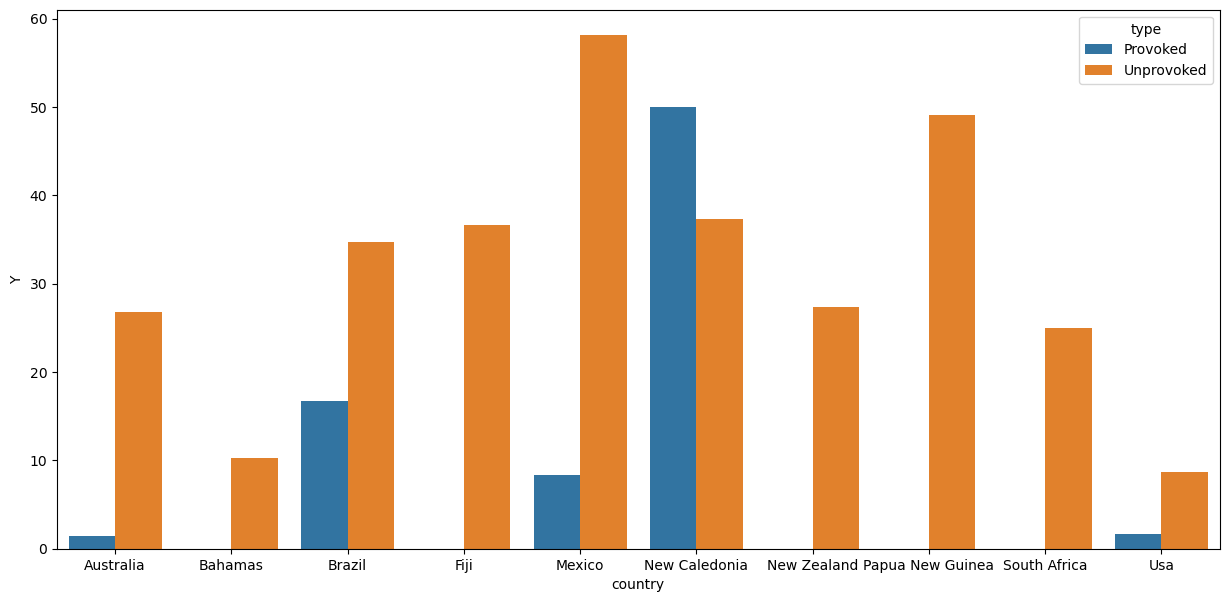

In [ ]:
#LETS PLOT THIS INFORMATION TAKING ONLY THE TOP 10 COUNTRIES WITH SHARKATTACKS INTO A BAR CHART WHERE THE Y AXIS IS THE FATALITY RATE AND X AXIS IS THE COUNTRY AND WE CAN SEE THE TYPE OF ATTACK

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))

top_8_countries = sharkattacks_data["country"].value_counts().head(10).index
fatal_rates_filtered = fatality_rates[fatality_rates["country"].isin(top_8_countries)]
sns.barplot(data=fatal_rates_filtered, x="country", y="Y", hue="type")

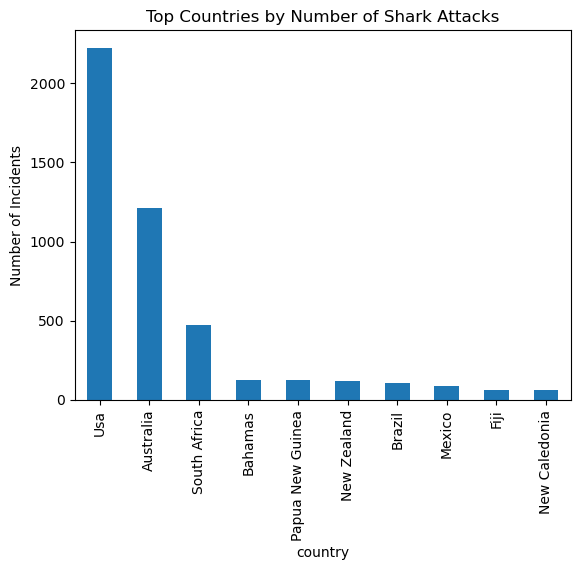

In [ ]:
#BAR CHART ON THE COUNTS OF SHARKATTACKS FOR THE TOP 10 COUNTRIES

sharkattacks_data["country"].value_counts().head(10).plot(kind="bar")
plt.title("Top Countries by Number of Shark Attacks")
plt.ylabel("Number of Incidents")
plt.show()

## TESTING OUR HYPOTHESIS: CHI-SQUARE TEST OF INDEPENDENCE

To directly test our hypothesis and determine if there is a statistically significant correlation between attack type (provoked/unprovoked) and fatality outcome we can carry out a chi-square test

Varibles:

  - chi2 --> The chi-square statistic which measures how different the observed values are from expected values
  - p --> The p-value which tells us whether the relationship is statistically significant
  - dof --> Degrees of freedom which is used in the calculation of the test
  - expected --> The expected frequencies if there were no relationship between the variables

What our results will tell us:
- If p < 0.05, we reject the null hypothesis meaning there is a significant correlation between attack type and fatality outcome.
- If p => 0.05, we fail to reject the null hypothesis meaning there is no significant correlation between attack type and fatality outcome.


In [ ]:
# CHI-SQUARE TEST: TO DIRECTLY TEST OUR HYPOTHESIS AND DETERMINE IF THERE IS A STATISTICALLY SIGNIFICANT ASSOCIATION BETWEEN ATTACK TYPE AND FATALITY OUTCOME 

import pandas as pd
from scipy.stats import chi2_contingency

#FIRST WE NEED TO CREATE A CONTINGENCY TABLE TO SHOW THE FREQUENCY OF FATAL AND NON-FATAL ATTACKS FOR EACH TYPE 

contingency_table = pd.crosstab(sharkattacks_data["type"], sharkattacks_data["fatal_y/n"])
display(contingency_table)

# THEN WE PERFORM A CHI-SQUARE TEST 

chi2, p, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

# LETS DISPLAY OUR EXPECTED FREQUENCIES

expected_df = pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns)

print("\nExpected Frequencies:")
print(expected_df)

#INTERPRETATION: WHAT DOES OUR TEST TELL US?

sigfig = 0.05  # significance level

if p < sigfig:
    print("\nResult: p < 0.05 → Reject the Null Hypothesis.")
    print("There is a statistically significant association between attack type and fatality.")
else:
    print("\nResult: p ≥ 0.05 → Fail to Reject the Null Hypothesis.")
    print("There is no statistically significant association between attack type and fatality.")

fatal_y/n,N,Y
type,,
Provoked,512,11
Unprovoked,3412,863



Chi-Square Test Results:
Chi-square statistic: 101.08158546895227
p-value: 8.827171851259123e-24
Degrees of freedom: 1

Expected Frequencies:
fatal_y/n             N           Y
type                               
Provoked     427.730721   95.269279
Unprovoked  3496.269279  778.730721

Result: p < 0.05 → Reject the Null Hypothesis.
There is a statistically significant association between attack type and fatality.
